Given the following wave equation: 
\begin{align}
    \psi(x) = 
    \begin{cases}
    0 & x<0 \\
    c e^{-x} & 0 \leq x
    \end{cases}
\end{align}
\begin{align}
    1 &= \int_{-\infty}^{\infty} |\psi|^2 \text{d}x \\
    &= \int_{-\infty}^{0} |0|^2 \text{d}x + \int_{0}^{\infty} |c e^{-x/L}|^2 \text{d}     x \\
    &= |c|^2 \int_{0}^{\infty}  e^{-2x} \text{d}x \\
    &= |c|^2 \frac{1}{2} \\
\end{align}
We now have $|c|^2 = 2 $, in accordance with convention $|c| = \sqrt{2} $    
We now wish to find the probability of finding the particle in the range $x\leq 1$,
\begin{align}
    P_{[1,\infty)} &= \int_{1}^{\infty} 2 e^{-2x} \text{d} x\\
    &= \mathrm{e}^{-2}\\
    & \approx 0.1353352832366127
\end{align}


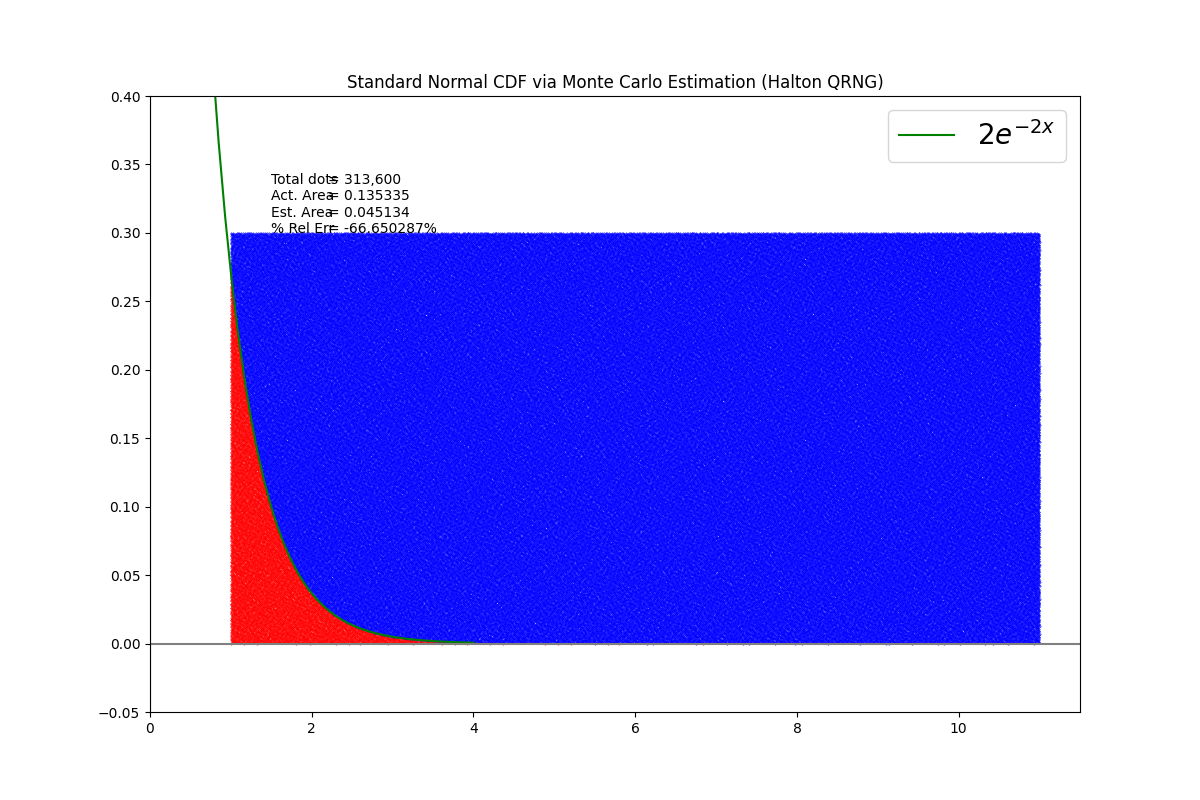

In [2]:
"""particle_location.ipynb"""
# cell 2

# this code was extracted from the "mc_std_normal.ipynb", with the changes being the area and the function 
# it would seem that the height of the rectangle greatly influences the estimation 

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from numba import float64, vectorize  # type: ignore

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def f(x: NDArray[np.float_]) -> NDArray[np.float_]:
    return np.exp(-2 * x) * 2


@vectorize([float64(float64, float64)], nopython=True)  # type: ignore
def halton(n: float, p: int) -> float:
    h = 0
    f = 1
    while n > 0:
        f: float = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def plot_std_normal(ax: Axes) -> None:
    iterations_sqrt: int = 560
    iterations: int = iterations_sqrt**2

    primes: list[int] = [2, 3]

    x: NDArray[np.float_] = halton(np.arange(iterations), primes[0]) * 10.0 + 1.0  # type: ignore
    y: NDArray[np.float_] = halton(np.arange(iterations), primes[1]) * 0.3  # type: ignore

    d: NDArray[np.float_] = f(x) - y

    x_in: NDArray[np.float_] = x[d >= 0.0]
    y_in: NDArray[np.float_] = y[d >= 0.0]

    x_out: NDArray[np.float_] = x[d < 0.0]
    y_out: NDArray[np.float_] = y[d < 0.0]

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x_in, y_in, color="red", marker=MarkerStyle("."), s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=MarkerStyle("."), s=pixel_size)

    act_x: NDArray[np.float_] = np.linspace(-4, 4, 100)
    act_y: NDArray[np.float_] = f(act_x)
    ax.plot(
        act_x, act_y, color="green", label=r"$2e^{-2x}$"
    )

    est_area: float = np.count_nonzero(d >= 0.0) / iterations
    act_area = 0.1353352832366127
    err: float = (est_area - act_area) / act_area

    ax.set_title("Standard Normal CDF via Monte Carlo Estimation (Halton QRNG)")
    ax.set_xlim(0.0, 11.5)
    ax.set_ylim(-0.05, 0.4)
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")
    ax.legend(loc="upper right", fontsize="20")

    ax.text(1.5, 0.3, "Total dots\nAct. Area\nEst. Area\n% Rel Err", ha="left")

    # fmt: off
    ax.text(2.2, 0.3,
        f"= {iterations:,}\n= {act_area:.6f}\n= {est_area:.6f}\n= {err:.6%}", ha="left")
    # fmt: on


def main() -> None:
    plt.close("all")
    plt.figure(" ", figsize=(12, 8))
    plot_std_normal(plt.axes())
    plt.show()


main()

In [21]:
"""particle_location.ipynb"""
# cell 3 

# this is with the use of scipy

from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np 

def pdf(x: float) -> float: 
    return 2 * np.exp(-2 * x)

p: float = quad(pdf,1,10)[0]

actual_integral = 0.1353352832366127

relative_error = abs((p - actual_integral) / actual_integral)


print("Estimated integral value:", p)
print("Actual integral value:", actual_integral)
print("Relative error:", relative_error)



Estimated integral value: 0.13533528117545912
Actual integral value: 0.1353352832366127
Relative error: 1.5229979439595516e-08


Estimated integral value: 0.1319722736198149
Actual integral value: 0.1353352832366127
Relative error: 0.024849466719762264
Number of points: 20000


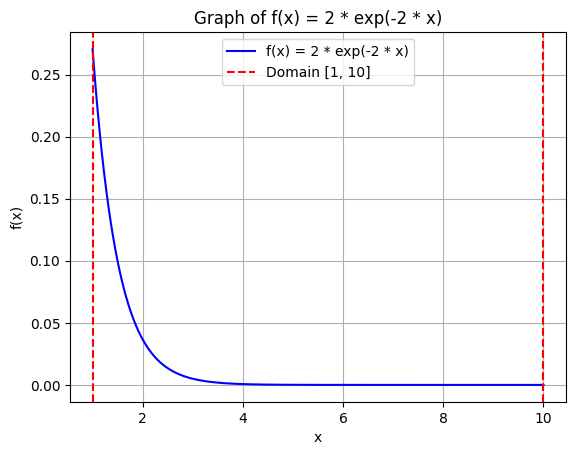

In [1]:
"""particle_location.ipynb"""
# cell 4

# This cell is what chatgpt produces when asked to write a code that uses the monte carlo method

import random
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-2 * x) * 2

def monte_carlo_integral(a, b, num_samples):
    total = 0
    x_samples = []
    y_samples = []

    for _ in range(num_samples):
        x = random.uniform(a, b)
        total += f(x)
        x_samples.append(x)
        y_samples.append(f(x))

    return (b - a) * total / num_samples, x_samples, y_samples

# Define the interval [a, b] and the number of samples
a = 1
b = 10
num_samples = 20_000

estimated_integral, x_samples, y_samples = monte_carlo_integral(a, b, num_samples)
print("Estimated integral value:", estimated_integral)

# Calculate the actual integral for comparison
actual_integral = 0.1353352832366127
relative_error = abs((estimated_integral - actual_integral) / actual_integral)

print("Actual integral value:", actual_integral)
print("Relative error:", relative_error)
print("Number of points:", num_samples)

# Generate points for the graph
x_values = np.linspace(a, b, 1000)
y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values, label='f(x) = 2 * exp(-2 * x)', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) = 2 * exp(-2 * x)')
plt.grid(True)

# Highlight the domain [0, 1] with vertical lines
plt.axvline(x=a, color='red', linestyle='--', label='Domain [1, 10]')
plt.axvline(x=b, color='red', linestyle='--')

plt.legend()
plt.show()

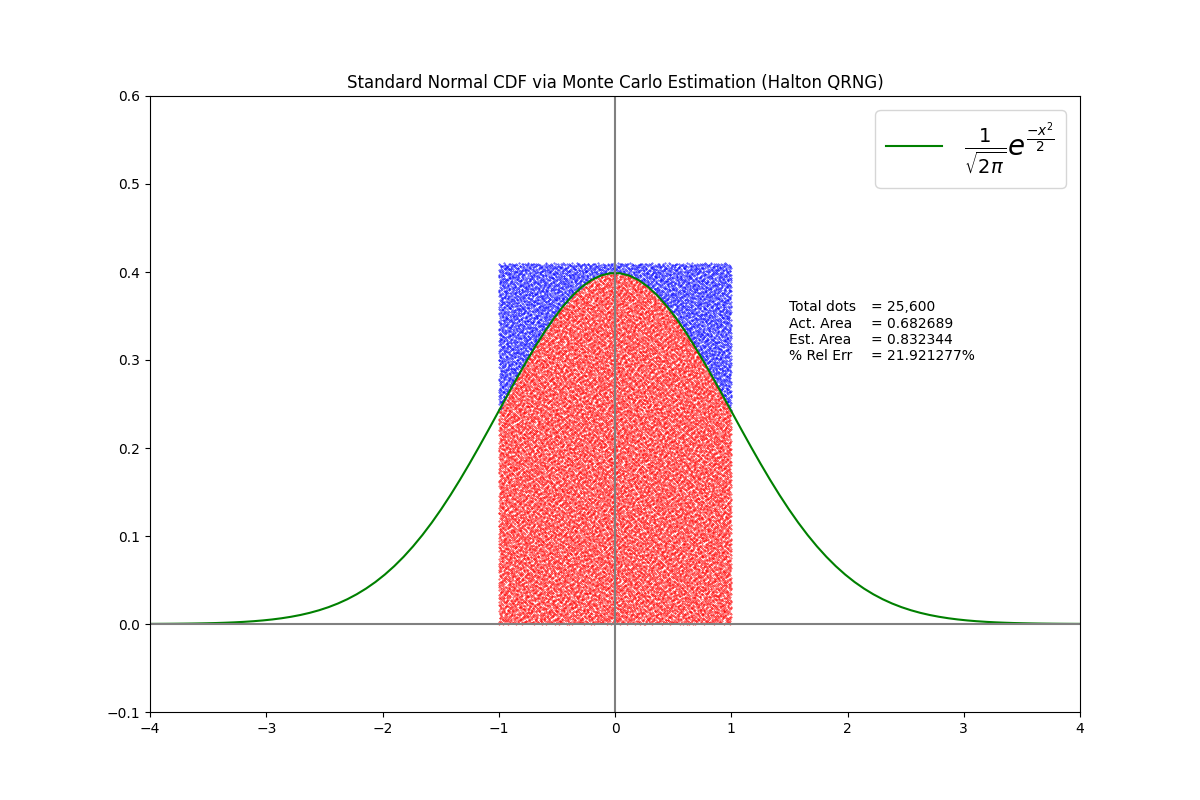

In [5]:
"""particle_location.ipynb"""
# cell 5

# This cell contains the code extracted from "mc_std_normal.ipynb" with the only change being the height of the rectangle 
# this is done to ilustrate how chaotically the height affects the estimation
from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from numba import float64, vectorize  # type: ignore

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def f(x: NDArray[np.float_]) -> NDArray[np.float_]:
    return 1.0 / np.sqrt(2.0 * np.pi) * np.exp(-np.power(x, 2) / 2.0)


@vectorize([float64(float64, float64)], nopython=True)  # type: ignore
def halton(n: float, p: int) -> float:
    h = 0
    f = 1
    while n > 0:
        f: float = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def plot_std_normal(ax: Axes) -> None:
    iterations_sqrt: int = 160
    iterations: int = iterations_sqrt**2

    primes: list[int] = [2, 3]

    x: NDArray[np.float_] = halton(np.arange(iterations), primes[0]) * 2.0 - 1.0  # type: ignore
    y: NDArray[np.float_] = halton(np.arange(iterations), primes[1]) * 0.41  # type: ignore             # change happens here from .5 to .41

    d: NDArray[np.float_] = f(x) - y

    x_in: NDArray[np.float_] = x[d >= 0.0]
    y_in: NDArray[np.float_] = y[d >= 0.0]

    x_out: NDArray[np.float_] = x[d < 0.0]
    y_out: NDArray[np.float_] = y[d < 0.0]

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x_in, y_in, color="red", marker=MarkerStyle("."), s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=MarkerStyle("."), s=pixel_size)

    act_x: NDArray[np.float_] = np.linspace(-4, 4, 100)
    act_y: NDArray[np.float_] = f(act_x)
    ax.plot(
        act_x, act_y, color="green", label=r"$\frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}$"
    )

    est_area: float = np.count_nonzero(d >= 0.0) / iterations
    act_area = 0.682689492
    err: float = (est_area - act_area) / act_area

    ax.set_title("Standard Normal CDF via Monte Carlo Estimation (Halton QRNG)")
    ax.set_xlim(-4.0, 4.0)
    ax.set_ylim(-0.1, 0.6)
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")
    ax.legend(loc="upper right", fontsize="20")

    ax.text(1.5, 0.3, "Total dots\nAct. Area\nEst. Area\n% Rel Err", ha="left")

    # fmt: off
    ax.text(2.2, 0.3,
        f"= {iterations:,}\n= {act_area:.6f}\n= {est_area:.6f}\n= {err:.6%}", ha="left")
    # fmt: on


def main() -> None:
    plt.close("all")
    plt.figure(" ", figsize=(12, 8))
    plot_std_normal(plt.axes())
    plt.show()


main()